In [1]:
# load libraries & setting path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#default viz template
sns.set(style="whitegrid")

#load datasets
df = pd.read_parquet("../data/processed/df_clean.parquet")
basket_revenue = pd.read_parquet("../data/processed/basket_revenue.parquet")
transactions = pd.read_parquet("../data/processed/transactions.parquet")

df.head()

,BasketID,Customer ID,InvoiceDate,StockCode,Product,Quantity,Price,Revenue,Country
0,493414,14590.0,2010-01-04 10:28:00,21844,retro spot mug,36,2.55,91.8,United Kingdom
1,493414,14590.0,2010-01-04 10:28:00,21533,retro spot large milk jug,12,4.25,51.0,United Kingdom
2,493414,14590.0,2010-01-04 10:28:00,37508,new england ceramic cake server,2,2.55,5.1,United Kingdom
3,493414,14590.0,2010-01-04 10:28:00,35001G,hand open shape gold,2,4.25,8.5,United Kingdom
4,493414,14590.0,2010-01-04 10:28:00,21527,retro spot traditional teapot,12,6.95,83.4,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336100 entries, 0 to 336099
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   BasketID     336100 non-null  object        
 1   Customer ID  336100 non-null  float64       
 2   InvoiceDate  336100 non-null  datetime64[ns]
 3   StockCode    336100 non-null  object        
 4   Product      336100 non-null  object        
 5   Quantity     336100 non-null  int64         
 6   Price        336100 non-null  float64       
 7   Revenue      336100 non-null  float64       
 8   Country      336100 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 23.1+ MB


In [11]:
# basic counts to understand dataset size and structure
n_rows = len(df)
n_baskets = df["BasketID"].nunique()
n_customers = df["Customer ID"].nunique()
n_products = df["Product"].nunique()

print("Total rows:", n_rows)
print("Unique baskets:", n_baskets)
print("Unique customers:", n_customers)
print("Unique products:", n_products)

Total rows: 336100
Unique baskets: 16178
Unique customers: 3861
Unique products: 4240


In [13]:
# compute basket size: number of products in each basket
# transactions["products"] is a list of products per BasketID
basket_size = transactions["products"].apply(len)

print("Average basket size:", basket_size.mean())
print("Median basket size:", basket_size.median())

Average basket size: 20.42026208431203
Median basket size: 15.0


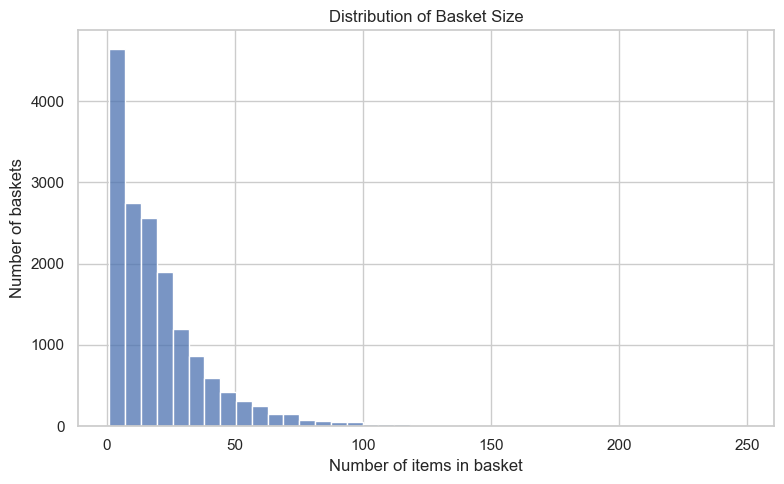

In [19]:
# plot distribution of basket size
plt.figure(figsize=(8, 5))
sns.histplot(basket_size, bins=40, kde=False)
plt.title("Distribution of Basket Size")
plt.xlabel("Number of items in basket")
plt.ylabel("Number of baskets")
plt.tight_layout()

# save figure 
plt.savefig("../reports/figures/basket_size_distribution.png")
plt.show()

In [21]:
# aggregate total quantity sold per product
product_qty = (
    df.groupby("Product")["Quantity"]
      .sum()
      .sort_values(ascending=False)
)

# take only the top 20
top20_qty = product_qty.head(20)

top20_qty.head()

Product
world war 2 gliders asstd designs     48835
brocade ring purse                    47223
white hanging heart t-light holder    45935
assorted colour bird ornament         36916
pack of 72 retro spot cake cases      31022
Name: Quantity, dtype: int64

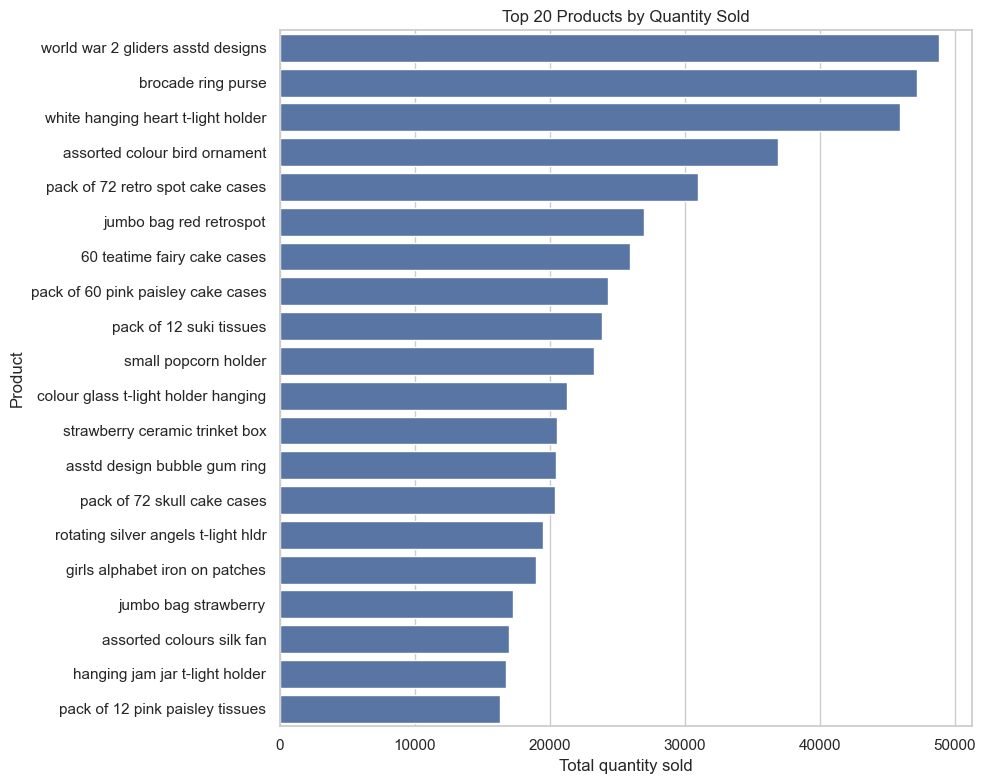

In [25]:
# bar plot of top 20 products by quantity
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top20_qty.values,
    y=top20_qty.index
)
plt.title("Top 20 Products by Quantity Sold")
plt.xlabel("Total quantity sold")
plt.ylabel("Product")
plt.tight_layout()

plt.savefig("../reports/figures/top20_products_quantity.png")
plt.show()

In [27]:
# quick stats for basket revenue
basket_revenue["basket_revenue"].describe()

count    16178.000000
mean       418.542793
std        768.465649
min          0.840000
25%        154.170000
50%        297.840000
75%        450.902500
max      33167.800000
Name: basket_revenue, dtype: float64

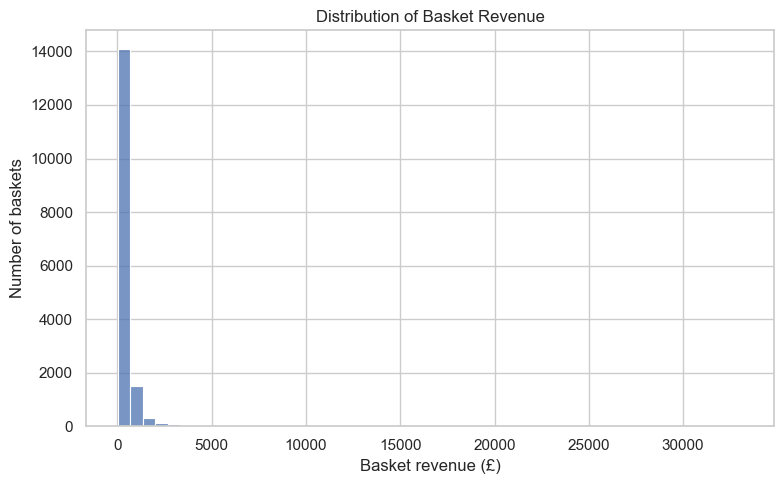

In [31]:
# plot distribution of basket revenue
plt.figure(figsize=(8, 5))
sns.histplot(basket_revenue["basket_revenue"], bins=50)
plt.title("Distribution of Basket Revenue")
plt.xlabel("Basket revenue (£)")
plt.ylabel("Number of baskets")
plt.tight_layout()

plt.savefig("../reports/figures/basket_revenue_distribution.png")
plt.show()

In [33]:
# aggregate total revenue (Quantity * UnitPrice) per product
product_revenue = (
    df.groupby("Product")["Revenue"]
      .sum()
      .sort_values(ascending=False)
)

top20_rev = product_revenue.head(20)
top20_rev.head()

Product
regency cakestand 3 tier              123029.85
white hanging heart t-light holder    122731.25
assorted colour bird ornament          58512.28
manual                                 52032.92
jumbo bag red retrospot                47215.65
Name: Revenue, dtype: float64

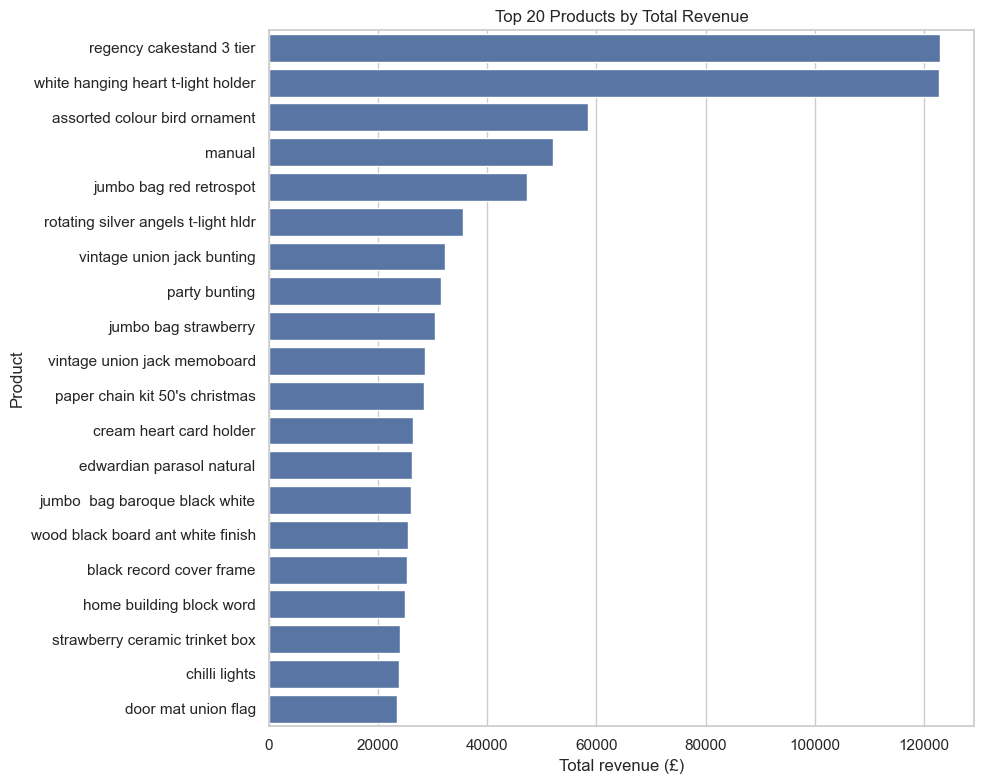

In [37]:
# bar plot of top 20 products by total revenue
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top20_rev.values,
    y=top20_rev.index
)
plt.title("Top 20 Products by Total Revenue")
plt.xlabel("Total revenue (£)")
plt.ylabel("Product")
plt.tight_layout()

plt.savefig("../reports/figures/top20_products_revenue.png")
plt.show()

Some products generate a lot of revenue not because they’re expensive, but because they sell in large quantities.

In [40]:
# ensure InvoiceDate is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# create a month column (YYYY-MM)
df["Month"] = df["InvoiceDate"].dt.to_period("M").astype(str)

# aggregate revenue per month
monthly_revenue = (
    df.groupby("Month")["Revenue"]
      .sum()
      .sort_index()
)

monthly_revenue

Month
2010-01    415030.502
2010-02    409265.826
2010-03    587165.941
2010-04    500776.051
2010-05    501394.560
2010-06    538672.610
2010-07    502350.000
2010-08    506470.040
2010-09    679069.921
2010-10    875722.880
2010-11    977832.812
2010-12    277434.160
Name: Revenue, dtype: float64

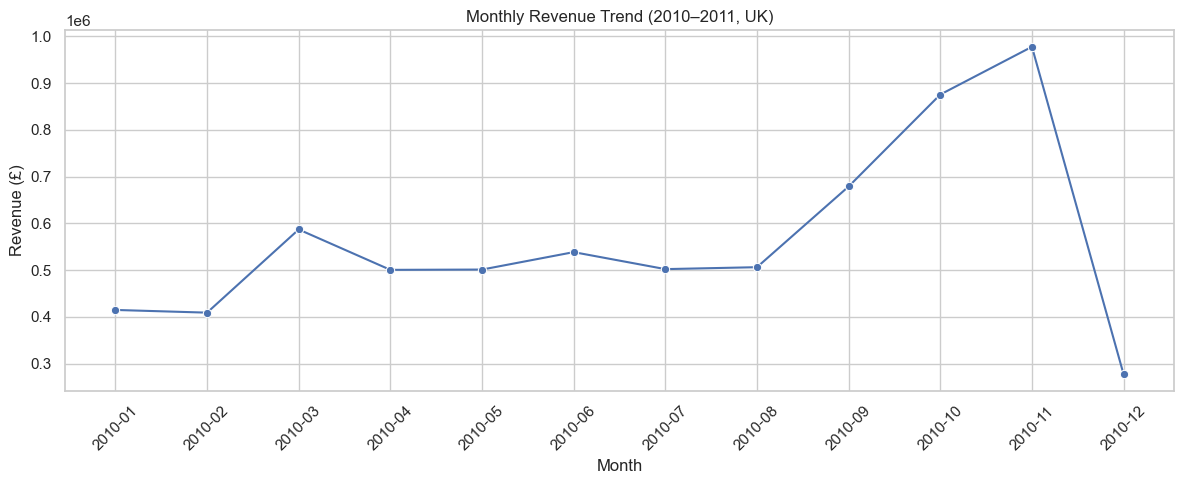

In [44]:
# line plot of monthly revenue trend
plt.figure(figsize=(12, 5))
sns.lineplot(
    x=monthly_revenue.index,
    y=monthly_revenue.values,
    marker="o"
)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend (2010–2011, UK)")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.tight_layout()

plt.savefig("../reports/figures/monthly_revenue_trend.png")
plt.show()


In [48]:
# number of distinct baskets per customer
orders_per_customer = (
    df.groupby("Customer ID")["BasketID"]
      .nunique()
)

# total revenue per customer
revenue_per_customer = (
    df.groupby("Customer ID")["Revenue"]
      .sum()
)

print("Average orders per customer:", round(orders_per_customer.mean(), 2))
print("Median orders per customer:", round(orders_per_customer.median(), 2))
print("Average revenue per customer:", round(revenue_per_customer.mean(), 2))
print("Median revenue per customer:", round(revenue_per_customer.median(), 2))

Average orders per customer: 4.19
Median orders per customer: 2.0
Average revenue per customer: 1753.74
Median revenue per customer: 652.75


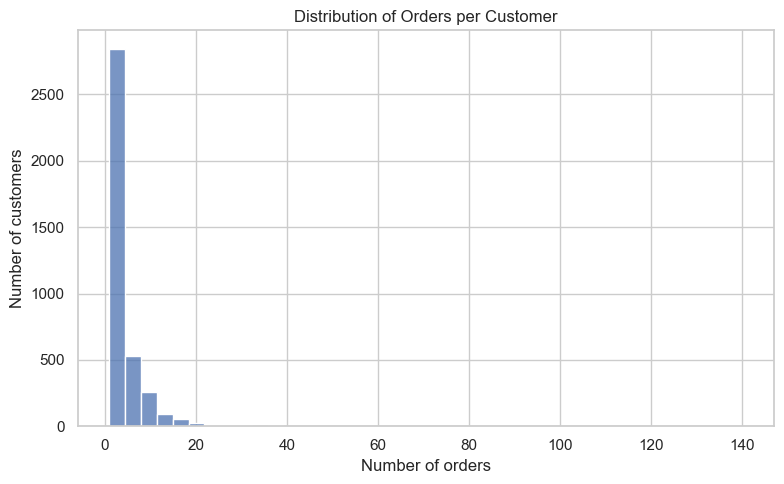

In [50]:
# distribution of orders per customer
plt.figure(figsize=(8, 5))
sns.histplot(orders_per_customer, bins=40)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of orders")
plt.ylabel("Number of customers")
plt.tight_layout()

plt.savefig("../reports/figures/orders_per_customer_distribution.png")
plt.show()

In [54]:
# build a small summary dict for quick reference
basket_size = transactions["products"].apply(len)

eda_summary = {
    "total_rows": len(df),
    "unique_baskets": df["BasketID"].nunique(),
    "unique_customers": df["Customer ID"].nunique(),
    "unique_products": df["Product"].nunique(),
    "avg_basket_size": basket_size.mean(),
    "median_basket_size": basket_size.median(),
    "avg_basket_revenue": basket_revenue["basket_revenue"].mean(),
    "median_basket_revenue": basket_revenue["basket_revenue"].median(),
}

# convert to Series and save
summary_series = pd.Series(eda_summary)
summary_series

total_rows               336100.000000
unique_baskets            16178.000000
unique_customers           3861.000000
unique_products            4240.000000
avg_basket_size              20.420262
median_basket_size           15.000000
avg_basket_revenue          418.542793
median_basket_revenue       297.840000
dtype: float64

In [62]:
summary_series.to_csv(Path("../data/processed") / "eda_summary.csv")